In [1]:
#Import Python Libraries
import seaborn as sns 
import matplotlib 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor

from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_absolute_error 

In [2]:
#Read in the Data File of Journeys and Weather Data
FinalDataDF = pd.read_csv("finaldatadf.csv")

In [3]:
#Check no missing data
FinalDataDF.isnull().sum()

Date           0
HourGroup      0
Temperature    0
Wind           0
Rain           0
NumJourneys    0
DayOfWeek      0
Month          0
dtype: int64

In [5]:
#One Hot Coding - Hour Group

dummyhourgroup = pd.get_dummies(FinalDataDF.HourGroup,prefix='Hour')
HoldingDF = pd.concat([FinalDataDF,dummyhourgroup.drop('Hour_21',axis ='columns')],axis='columns')
FinalDataDF = HoldingDF.drop('HourGroup',axis='columns')

FinalDataDF

Date  Temperature      Wind   Rain  NumJourneys DayOfWeek Month  \
0     2019-09-01    18.646667  0.450000   0.00         26.0       Sun   Sep   
1     2019-09-01    18.340000  0.450000   3.65          4.0       Sun   Sep   
2     2019-09-01    18.480000  1.446667   4.52         10.0       Sun   Sep   
3     2019-09-01    20.140000  1.593333   1.64         37.0       Sun   Sep   
4     2019-09-01    21.120000  1.340000   0.60         91.0       Sun   Sep   
...          ...          ...       ...    ...          ...       ...   ...   
5843  2021-08-31    22.933333  0.513333   1.38         50.0       Tue   Aug   
5844  2021-08-31    23.506667  1.600000  27.12         31.0       Tue   Aug   
5845  2021-08-31    21.800000  0.960000  18.80         34.0       Tue   Aug   
5846  2021-08-31    21.153333  0.513333   8.35         22.0       Tue   Aug   
5847  2021-08-31    20.310000  2.210000   2.37         12.0       Tue   Aug   

      Hour_0  Hour_3  Hour_6  Hour_9  Hour_12  Hour_15  Hour_18  
0          1       0       0       0        0        0        0  
1          0       1       0       0        0        0        0  
2          0       0       1       0        0        0        0  
3          0       0       0       1        0        0        0  
4          0       0       0       0        1        0        0  
...      ...     ...     ...     ...      ...      ...      ...  
5843       0       0       0       1        0        0        0  
5844       0       0       0       0        1        0        0  
5845       0       0       0       0        0        1        0  
5846       0       0       0       0        0        0        1  
5847       0       0       0       0        0        0        0  

[5848 rows x 14 columns]

In [6]:
#One Hot Coding - Day Of Week

dummydayofweek = pd.get_dummies(FinalDataDF.DayOfWeek)
HoldingDF = pd.concat([FinalDataDF,dummydayofweek.drop('Sun',axis ='columns')],axis='columns')
FinalDataDF = HoldingDF.drop('DayOfWeek',axis='columns')

FinalDataDF

Date  Temperature      Wind   Rain  NumJourneys Month  Hour_0  \
0     2019-09-01    18.646667  0.450000   0.00         26.0   Sep       1   
1     2019-09-01    18.340000  0.450000   3.65          4.0   Sep       0   
2     2019-09-01    18.480000  1.446667   4.52         10.0   Sep       0   
3     2019-09-01    20.140000  1.593333   1.64         37.0   Sep       0   
4     2019-09-01    21.120000  1.340000   0.60         91.0   Sep       0   
...          ...          ...       ...    ...          ...   ...     ...   
5843  2021-08-31    22.933333  0.513333   1.38         50.0   Aug       0   
5844  2021-08-31    23.506667  1.600000  27.12         31.0   Aug       0   
5845  2021-08-31    21.800000  0.960000  18.80         34.0   Aug       0   
5846  2021-08-31    21.153333  0.513333   8.35         22.0   Aug       0   
5847  2021-08-31    20.310000  2.210000   2.37         12.0   Aug       0   

      Hour_3  Hour_6  Hour_9  Hour_12  Hour_15  Hour_18  Fri  Mon  Sat  Thu  \
0          0       0       0        0        0        0    0    0    0    0   
1          1       0       0        0        0        0    0    0    0    0   
2          0       1       0        0        0        0    0    0    0    0   
3          0       0       1        0        0        0    0    0    0    0   
4          0       0       0        1        0        0    0    0    0    0   
...      ...     ...     ...      ...      ...      ...  ...  ...  ...  ...   
5843       0       0       1        0        0        0    0    0    0    0   
5844       0       0       0        1        0        0    0    0    0    0   
5845       0       0       0        0        1        0    0    0    0    0   
5846       0       0       0        0        0        1    0    0    0    0   
5847       0       0       0        0        0        0    0    0    0    0   

      Tue  Wed  
0       0    0  
1       0    0  
2       0    0  
3       0    0  
4       0    0  
...   ...  ...  
5843    1    0  
5844    1    0  
5845    1    0  
5846    1    0  
5847    1    0  

[5848 rows x 19 columns]

In [7]:
#One Hot Coding - Month

dummymonth = pd.get_dummies(FinalDataDF.Month)
HoldingDF = pd.concat([FinalDataDF,dummymonth.drop('Dec',axis ='columns')],axis='columns')
FinalDataDF = HoldingDF.drop('Month',axis='columns')
FinalDataDF

Date  Temperature      Wind   Rain  NumJourneys  Hour_0  Hour_3  \
0     2019-09-01    18.646667  0.450000   0.00         26.0       1       0   
1     2019-09-01    18.340000  0.450000   3.65          4.0       0       1   
2     2019-09-01    18.480000  1.446667   4.52         10.0       0       0   
3     2019-09-01    20.140000  1.593333   1.64         37.0       0       0   
4     2019-09-01    21.120000  1.340000   0.60         91.0       0       0   
...          ...          ...       ...    ...          ...     ...     ...   
5843  2021-08-31    22.933333  0.513333   1.38         50.0       0       0   
5844  2021-08-31    23.506667  1.600000  27.12         31.0       0       0   
5845  2021-08-31    21.800000  0.960000  18.80         34.0       0       0   
5846  2021-08-31    21.153333  0.513333   8.35         22.0       0       0   
5847  2021-08-31    20.310000  2.210000   2.37         12.0       0       0   

      Hour_6  Hour_9  Hour_12  ...  Aug  Feb  Jan  Jul  Jun  Mar  May  Nov  \
0          0       0        0  ...    0    0    0    0    0    0    0    0   
1          0       0        0  ...    0    0    0    0    0    0    0    0   
2          1       0        0  ...    0    0    0    0    0    0    0    0   
3          0       1        0  ...    0    0    0    0    0    0    0    0   
4          0       0        1  ...    0    0    0    0    0    0    0    0   
...      ...     ...      ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
5843       0       1        0  ...    1    0    0    0    0    0    0    0   
5844       0       0        1  ...    1    0    0    0    0    0    0    0   
5845       0       0        0  ...    1    0    0    0    0    0    0    0   
5846       0       0        0  ...    1    0    0    0    0    0    0    0   
5847       0       0        0  ...    1    0    0    0    0    0    0    0   

      Oct  Sep  
0       0    1  
1       0    1  
2       0    1  
3       0    1  
4       0    1  
...   ...  ...  
5843    0    0  
5844    0    0  
5845    0    0  
5846    0    0  
5847    0    0  

[5848 rows x 29 columns]

In [8]:
#Drop uneeded date column - have day and month field one hot coded

FinalDataDF = FinalDataDF.drop(['Date'],axis='columns')

In [9]:
#Set up Test and Train data sets from the overall dataset

X = FinalDataDF.drop('NumJourneys',axis='columns')
y = FinalDataDF.NumJourneys

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)



In [10]:
#Set Up Gradient Boosing Model and Test parameters for Python to Iterate Through

GB_model = GradientBoostingRegressor(random_state=100)


gb_hyperparameters = {
      'n_estimators' : [100, 200],
      'learning_rate' : [0.05, 0.1, 0.25],
      'max_depth' : [1, 2, 5, 10]}


In [11]:
#After testing the parameters fit the best set 

GBmodel = GradientBoostingRegressor(learning_rate=0.25, max_depth=5, n_estimators=100,random_state=100)
GBmodel.fit(X_train,y_train)

GradientBoostingRegressor(learning_rate=0.25, max_depth=5, random_state=100)

In [12]:
#Find features with most importance for the model

GBimportances = GBmodel.feature_importances_
GBsorted_indices=np.argsort(GBimportances)[::-1]

In [13]:
#Review statistical results of actuals versus expected
y_predGB = GBmodel.predict(X_test)

from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_predGB))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_predGB))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_predGB)))
print("Explain variance score =", round(metrics.explained_variance_score(y_test, y_predGB), 3)) 
print("R2 score =", round(metrics.r2_score(y_test, y_predGB), 3))

Mean Absolute Error: 13.262576415153951
Mean Squared Error: 446.860192910243
Root Mean Squared Error: 21.13906792907963
Explain variance score = 0.786
R2 score = 0.786


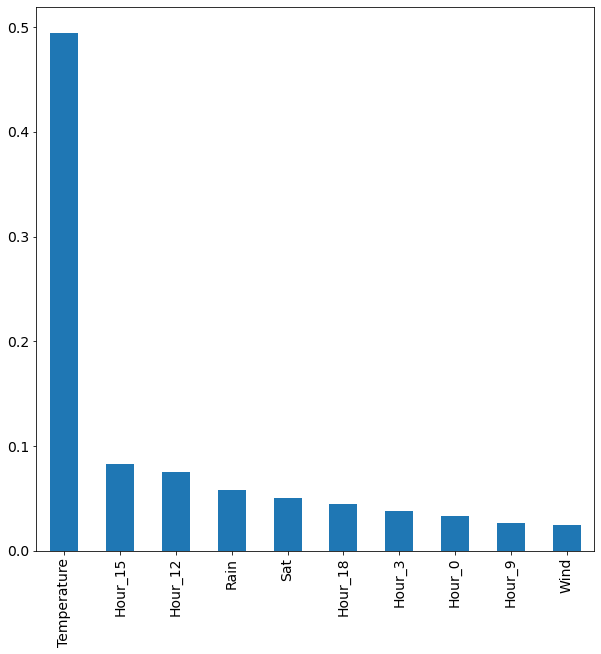

In [14]:
#Plot Most important features for Gradient Boost Model
plt.figure(figsize=(10,10))

feat_importances = pd.Series(GBmodel.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='bar', fontsize=14)

In [16]:
#Set up Decision Tree Model
DT_model = DecisionTreeRegressor(random_state=100)

dt_hyperparameters = {
    'max_depth': [2,4,6],
    'max_leaf_nodes': [0,20,40]}

In [17]:
#Find best parameters for Decision TRee Model
DT_Grid = GridSearchCV(estimator=DT_model,param_grid=dt_hyperparameters,cv=10,n_jobs=4)
DT_Grid.fit(X_train,y_train)
print(DT_Grid.best_params_)

{'max_depth': 6, 'max_leaf_nodes': 40}


In [18]:
#Fit Decision Tree model on best parameters
DTmodel = DecisionTreeRegressor(max_depth=6, max_leaf_nodes=40,random_state=100)
DTmodel.fit(X_train,y_train)


DecisionTreeRegressor(max_depth=6, max_leaf_nodes=40, random_state=100)

In [19]:
#Find most important features of Decision Tree Model
DTimportances = DTmodel.feature_importances_
DTsorted_indices=np.argsort(DTimportances)[::-1]


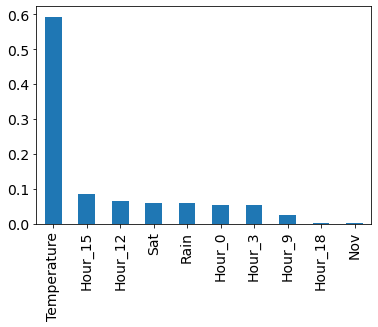

In [20]:
#Plot most important features
feat_importances = pd.Series(DTmodel.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='bar', fontsize=14)

In [21]:
#Review statistical results of actuals versus expected
y_predDT = DTmodel.predict(X_test)

from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_predDT))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_predDT))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_predDT)))
print("Explain variance score =", round(metrics.explained_variance_score(y_test, y_predDT), 3)) 
print("R2 score =", round(metrics.r2_score(y_test, y_predDT), 3))

Mean Absolute Error: 17.495078523964146
Mean Squared Error: 760.5669668531642
Root Mean Squared Error: 27.578378611752434
Explain variance score = 0.637
R2 score = 0.636


In [22]:
#Set up Random Forest Model
RF_model = RandomForestRegressor(random_state=100)
rf_hyperparameters = {
     'n_estimators' : [100, 200],
     'max_features' : ['auto', 'sqrt', 0.25],
     'min_samples_leaf' : [1, 2, 5, 10]}

In [23]:
#Python iterating through to find best fitting model
RF_Grid = GridSearchCV(estimator=RF_model,param_grid=rf_hyperparameters,cv=10,n_jobs=4)
RF_Grid.fit(X_train,y_train)
print(RF_Grid.best_params_)

{'max_features': 0.25, 'min_samples_leaf': 1, 'n_estimators': 200}


In [24]:
#fit Random forest model to best parameters
RFmodel = RandomForestRegressor(n_estimators=200, max_features=0.25, min_samples_leaf=1,random_state=100)
RFmodel.fit(X_train,y_train)

RandomForestRegressor(max_features=0.25, n_estimators=200, random_state=100)

In [25]:
#Caclualte most important features of the model and order the most important
RFimportances = RFmodel.feature_importances_
RFsorted_indices=np.argsort(RFimportances)[::-1]

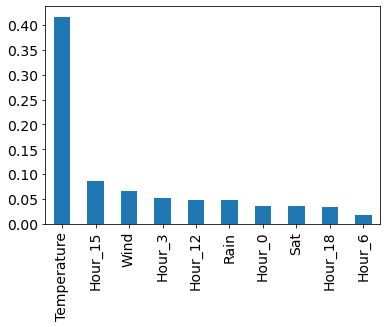

In [26]:
#PRint out most important model feature.
feat_importances = pd.Series(RFmodel.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='bar', fontsize=14)

In [27]:
#Review statistical results of actuals versus expected
y_predRF = RFmodel.predict(X_test)

from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_predRF))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_predRF))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_predRF)))
print("Explain variance score =", round(metrics.explained_variance_score(y_test, y_predRF), 3)) 
print("R2 score =", round(metrics.r2_score(y_test, y_predRF), 3))

Mean Absolute Error: 13.32785113960114
Mean Squared Error: 448.7390618690646
Root Mean Squared Error: 21.183461989699996
Explain variance score = 0.786
R2 score = 0.786


In [34]:
#Set up training data set and lasso model
from sklearn.preprocessing import StandardScaler

X = X.astype('int')
columnnames = X.columns


scaler = StandardScaler()
X[columnnames] = scaler.fit_transform(X[columnnames])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

In [35]:
#Python iterate through parameters for best fitting LAsso model.
Lasso_model = Lasso(random_state=100)
lasso_hyperparameters = {
    'alpha' : [0.001, 0.01, 0.1, 1,10,100,1000,10000,100000]}
Lasso_Grid = GridSearchCV(estimator=Lasso_model,param_grid=lasso_hyperparameters,cv=10,n_jobs=4)

Lasso_Grid.fit(X_train,y_train)
print(Lasso_Grid.best_params_)

{'alpha': 0.01}


In [36]:
#Train the model with best fitting parameter for Lasso model
Lassomodel = Lasso(alpha=0.01, random_state=100)
Lassomodel.fit(X_train,y_train)

Lasso(alpha=0.01, random_state=100)

Text(0.5, 1.0, 'Coefficients in the Lasso Model')

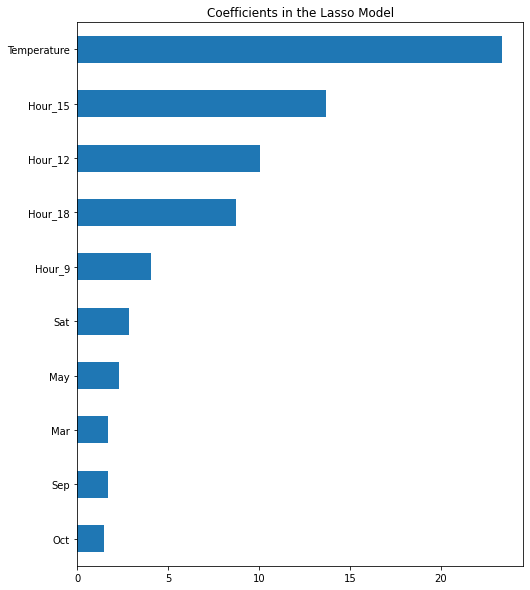

In [37]:
#Determine coefficients for the most important terms in model
lasso_coef=Lassomodel.fit(X_train,y_train).coef_

columnnames = X.columns

coef = pd.Series(lasso_coef, index = columnnames)

imp_coef = pd.concat([coef.sort_values().tail(10)])
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Coefficients in the Lasso Model")

In [38]:
#Review statistical results of actuals versus expected
y_predLasso = Lassomodel.predict(X_test)

from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_predLasso))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_predLasso))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_predLasso)))
print("Explain variance score =", round(metrics.explained_variance_score(y_test, y_predLasso), 3)) 
print("R2 score =", round(metrics.r2_score(y_test, y_predLasso), 3))

Mean Absolute Error: 20.450104925947716
Mean Squared Error: 805.3928063868469
Root Mean Squared Error: 28.379443376973533
Explain variance score = 0.615
R2 score = 0.615


In [39]:
#Find best parameters for Ridge Model
Ridge_model = Ridge(random_state=100)
ridge_hyperparameters = {
    'alpha' : [0.001, 0.01, 0.1, 1,10,100,1000,10000,100000]}
Ridge_Grid = GridSearchCV(estimator=Ridge_model,param_grid=ridge_hyperparameters,cv=10,n_jobs=4)
Ridge_Grid.fit(X_train,y_train)
print(Ridge_Grid.best_params_)


{'alpha': 10}


In [40]:
#USe best parameter to fit model
Ridgemodel = Ridge(alpha=10, random_state=42)
Ridgemodel.fit(X_train,y_train)

Ridge(alpha=10, random_state=42)

Text(0.5, 1.0, 'Coefficients in the Ridge Model')

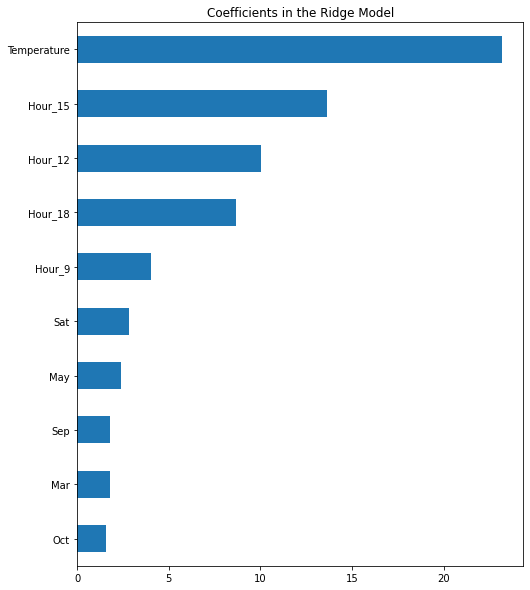

In [41]:
#Determine coefficients for the most important terms in model
ridge_coef=Ridgemodel.fit(X_train,y_train).coef_

columnnames = X.columns

coef = pd.Series(ridge_coef, index = columnnames)

imp_coef = pd.concat([coef.sort_values().tail(10)])
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Coefficients in the Ridge Model")

In [42]:
#Review statistical results of actuals versus expected
y_predRidge = Ridgemodel.predict(X_test)

from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_predRidge))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_predRidge))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_predRidge)))
print("Explain variance score =", round(metrics.explained_variance_score(y_test, y_predRidge), 3)) 
print("R2 score =", round(metrics.r2_score(y_test, y_predRidge), 3))

Mean Absolute Error: 20.442870686550943
Mean Squared Error: 805.3710839884363
Root Mean Squared Error: 28.37906066078362
Explain variance score = 0.615
R2 score = 0.615


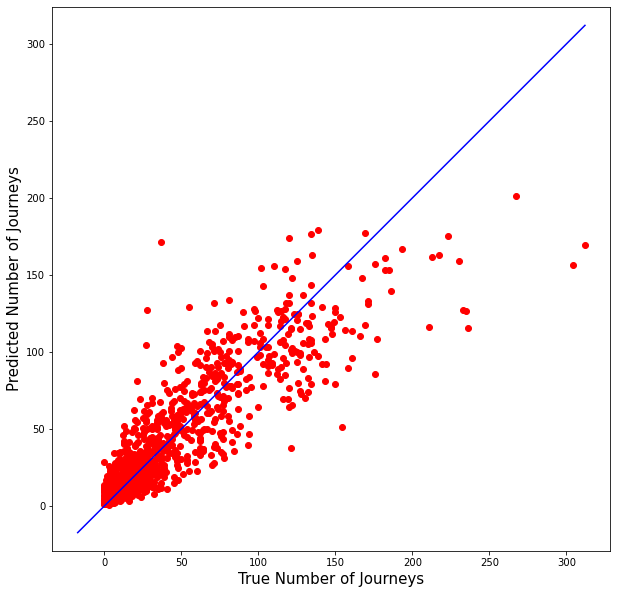

In [44]:
#Plot actuals versus expected of best performing model

plt.figure(figsize=(10,10))
plt.scatter(y_test, y_predRF, c='red')

p = max(max(y_predGB), max(y_test))
q = min(min(y_predGB), min(y_test))
plt.plot([p,q], [p,q], 'b-')
plt.xlabel('True Number of Journeys', fontsize=15)
plt.ylabel('Predicted Number of Journeys', fontsize=15)
plt.axis('equal')
plt.show()
